# 01: Building a pandas Cheat Sheet, Part 1

Use the csv I've attached to answer the following questions:

Import pandas with the right name

In [2]:
import pandas as pd

Set all graphics from matplotlib to display inline

In [3]:
%matplotlib inline

Read the csv in (it should be UTF-8 already so you don't have to worry about encoding), save it with the proper boring name

In [ ]:
df = pd.read_csv('07-hw-animals.csv')

Display the names of the columns in the csv

In [5]:
df.columns

Index(['animal', 'name', 'length'], dtype='object')

Display the first 3 animals.

In [6]:
df['animal'].head(3)

0    cat
1    cat
2    dog
Name: animal, dtype: object

Sort the animals to see the 3 longest animals.

In [7]:
df.sort_values('length', ascending = False).head(3)

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
1,cat,Bob,45


In [ ]:
# or
df.sort_values('length').tail(3)

What are the counts of the different values of the "animal" column? a.k.a. how many cats and how many dogs.

In [8]:
df['animal'].value_counts()

dog    3
cat    3
Name: animal, dtype: int64

Only select the dogs.

In [9]:
df[df['animal'] == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


Display all of the animals that are greater than 40 cm.

In [10]:
df[df['length'] > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


'length' is the animal's length in cm. Create a new column called inches that is the length in inches.

In [11]:
inches = df['length'] * 0.393701
df['inches'] = inches

Save the cats to a separate variable called "cats." Save the dogs to a separate variable called "dogs."

In [12]:
cats = df[df['animal'] == 'cat']
dogs = df[df['animal'] == 'dog']

Display all of the animals that are cats and above 12 inches long. First do it using the "cats" variable, then do it using your normal dataframe.

In [13]:
cats[cats['inches'] > 12]

,animal,name,length,inches
0,cat,Anne,35,13.779535
1,cat,Bob,45,17.716545
4,cat,Charlie,32,12.598432


In [14]:
df[(df['animal'] == 'cat') & (df['length'] > 12)]

,animal,name,length,inches
0,cat,Anne,35,13.779535
1,cat,Bob,45,17.716545
4,cat,Charlie,32,12.598432


What's the mean length of a cat?

In [15]:
cats['inches'].describe()

count     3.000000
mean     14.698171
std       2.679867
min      12.598432
25%      13.188984
50%      13.779535
75%      15.748040
max      17.716545
Name: inches, dtype: float64

What's the mean length of a dog?

In [16]:
dogs['inches'].describe()

count     3.000000
mean     19.685050
std       5.905515
min      13.779535
25%      16.732292
50%      19.685050
75%      22.637808
max      25.590565
Name: inches, dtype: float64

Use groupby to accomplish both of the above tasks at once.

In [17]:
df.groupby('animal').describe()

inches     length
animal                            
cat    count   3.000000   3.000000
       mean   14.698171  37.333333
       std     2.679867   6.806859
       min    12.598432  32.000000
       25%    13.188984  33.500000
       50%    13.779535  35.000000
       75%    15.748040  40.000000
       max    17.716545  45.000000
dog    count   3.000000   3.000000
       mean   19.685050  50.000000
       std     5.905515  15.000000
       min    13.779535  35.000000
       25%    16.732292  42.500000
       50%    19.685050  50.000000
       75%    22.637808  57.500000
       max    25.590565  65.000000

Make a histogram of the length of dogs. I apologize that it is so boring.

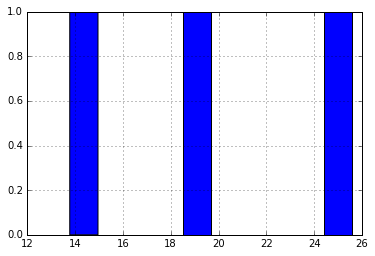

In [18]:
dogs['inches'].hist()

Change your graphing style to be something else (anything else!)

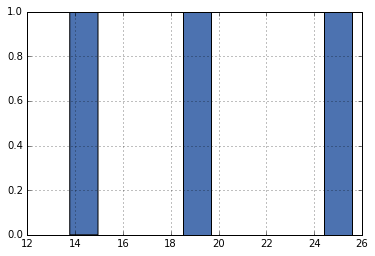

In [19]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
dogs['inches'].hist()

Make a horizontal bar graph of the length of the animals, with their name as the label (look at the billionaires notebook I put on Slack!)

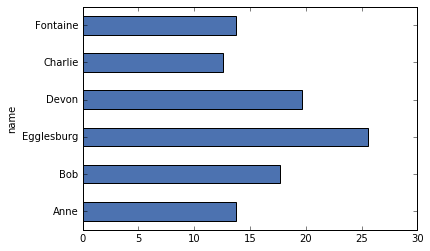

In [20]:
df.plot(kind = 'barh', x = 'name', y = 'inches', legend = False)

Make a sorted horizontal bar graph of the cats, with the larger cats on top.

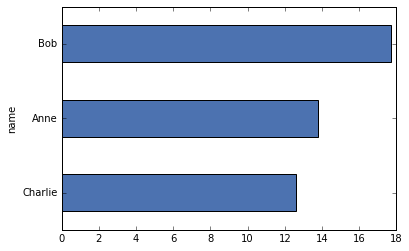

In [21]:
cats.sort_values('inches').plot(kind = 'barh', x = 'name', y = 'inches', legend=False)

# 02: Doing some research

Answer your own selection out of the following questions, or any other questions you might be able to think of.  Write the question down first in a markdown cell (use a # to make the question a nice header), THEN try to get an answer to it. A lot of these are remarkably similar, and some you'll need to do manual work for - the GDP ones, for example.

<p>If you are trying to figure out some other question that we didn't cover in class and it does not have to do with joining to another data set, we're happy to help you figure it out during lab!

<p>Take a peek at the billionaires notebook I uploaded into Slack; it should be helpful for the graphs (I added a few other styles and options, too). You'll probably also want to look at the "sum()" line I added.

## What country are most billionaires from? For the top ones, how many billionaires per billion people?

In [22]:
df = pd.read_excel('richpeople.xlsx')
df = df[df['year'] == 2014]

## My Second Try, Which Used a Spreadsheet of Populations

In [24]:
cp = pd.read_excel('API_SP_POP_TOTL_DS2_en_excel_v2_toprowsremoved.xls')

In [28]:
pop_df = pd.merge(df, cp[['Country Code', '2014']], how = 'left', left_on = 'countrycode', right_on = 'Country Code')

In [30]:
dict_freq_countries = pop_df['citizenship'].value_counts().head(10).to_dict()
dict_freq_countries

{'Brazil': 65,
 'China': 152,
 'France': 43,
 'Germany': 85,
 'Hong Kong': 45,
 'India': 56,
 'Italy': 35,
 'Russia': 111,
 'United Kingdom': 47,
 'United States': 499}

In [33]:
for x in dict_freq_countries:
    country_pop = pop_df[pop_df['citizenship'] == x].head(1).to_dict()
    for key in country_pop['2014'].keys():
        print(x, 'has', dict_freq_countries[x] / (country_pop['2014'][key] / 1000000000), 'billionaires per billion people.')
        if country_pop['2014'][key] / 1000000000 < 1:
            print('Of course, this is a nonsense figure for a country with less than a billion people.')
    print('')

Brazil has 315.414707889 billionaires per billion people.
Of course, this is a nonsense figure for a country with less than a billion people.

Russia has 771.800393867 billionaires per billion people.
Of course, this is a nonsense figure for a country with less than a billion people.

China has 111.414895878 billionaires per billion people.

India has 43.2335100948 billionaires per billion people.

United States has 1564.964584 billionaires per billion people.
Of course, this is a nonsense figure for a country with less than a billion people.

Italy has 575.76073621 billionaires per billion people.
Of course, this is a nonsense figure for a country with less than a billion people.

France has 649.375076915 billionaires per billion people.
Of course, this is a nonsense figure for a country with less than a billion people.

United Kingdom has 728.014710854 billionaires per billion people.
Of course, this is a nonsense figure for a country with less than a billion people.

Germany has 104

## My First Try, Where I Looked Up the Populations by Hand

In [34]:
df['citizenship'].value_counts().head(10)

United States     499
China             152
Russia            111
Germany            85
Brazil             65
India              56
United Kingdom     47
Hong Kong          45
France             43
Italy              35
Name: citizenship, dtype: int64

In [35]:
populations = [
    {'country': 'United States', 'pop': 0.3214}, 
    {'country': 'Germany', 'pop': 0.0809}, 
    {'country': 'China' , 'pop': 1.3675}, 
    {'country': 'Russia', 'pop': 0.1424}, 
    {'country': 'Japan', 'pop': 0.1269}, 
    {'country': 'Brazil' , 'pop': 0.2043}, 
    {'country': 'Hong Kong' , 'pop': 0.0071}, 
    {'country': 'France', 'pop': 0.0666}, 
    {'country': 'United Kingdom', 'pop': 0.0641}, 
    {'country': 'India', 'pop': 1.2517}, ]

for item in list(range(9)):
    print(populations[item]['country'], 'has', df['citizenship'].value_counts()[item] / populations[item]['pop'], 'billionaires per billion people.')
    if populations[item]['pop'] < 1:
        print('Of course, this is a nonsense figure for a country with less than a billion people.')
    print('')
#pop are in billions and based off of the CIA Factbook 2015 estimate

United States has 1552.58245177 billionaires per billion people.
Of course, this is a nonsense figure for a country with less than a billion people.

Germany has 1878.86279357 billionaires per billion people.
Of course, this is a nonsense figure for a country with less than a billion people.

China has 81.1700182815 billionaires per billion people.

Russia has 596.91011236 billionaires per billion people.
Of course, this is a nonsense figure for a country with less than a billion people.

Japan has 512.214342002 billionaires per billion people.
Of course, this is a nonsense figure for a country with less than a billion people.

Brazil has 274.106705825 billionaires per billion people.
Of course, this is a nonsense figure for a country with less than a billion people.

Hong Kong has 6619.71830986 billionaires per billion people.
Of course, this is a nonsense figure for a country with less than a billion people.

France has 675.675675676 billionaires per billion people.
Of course, this i

## Who are the top 10 richest billionaires?

In [36]:
df[['name', 'rank', 'networthusbillion']].sort_values('networthusbillion', ascending = False).head(10)

,name,rank,networthusbillion
284,Bill Gates,1,76.0
348,Carlos Slim Helu,2,72.0
124,Amancio Ortega,3,64.0
2491,Warren Buffett,4,58.2
1377,Larry Ellison,5,48.0
509,David Koch,6,40.0
381,Charles Koch,6,40.0
2185,Sheldon Adelson,8,38.0
429,Christy Walton,9,36.7
1128,Jim Walton,10,34.7


## What's the average wealth of a billionaire? Male? Female?

In [37]:
df[['gender', 'networthusbillion']].groupby('gender').describe()

networthusbillion
gender                         
female count         180.000000
       mean            3.920556
       std             5.312604
       min             1.000000
       25%             1.400000
       50%             2.300000
       75%             3.700000
       max            36.700000
male   count        1473.000000
       mean            3.902716
       std             5.801227
       min             1.000000
       25%             1.400000
       50%             2.100000
       75%             3.700000
       max            76.000000

## Who is the poorest billionaire? Who are the top 10 poorest billionaires?

## The 'Top 10' Poorest

In [38]:
df[['name', 'rank', 'networthusbillion']].sort_values('networthusbillion').head(10)

,name,rank,networthusbillion
234,B.R. Shetty,1565,1.0
2092,Rostam Azizi,1565,1.0
2401,Tory Burch,1565,1.0
734,Fred Chang,1565,1.0
171,Angela Bennett,1565,1.0
748,Fu Kwan,1565,1.0
2107,Ryan Kavanaugh,1565,1.0
1783,O. Francis Biondi,1565,1.0
1371,Lam Fong Ngo,1565,1.0
702,Feng Hailiang,1565,1.0


## But There Are Many More People Who Make Just As Little Money

In [39]:
poorest_billionaires = df[(df['networthusbillion']) == (df['networthusbillion'].sort_values().head(1).values[0])]
print('But there are', poorest_billionaires['name'].count(), 'billionaires making just as little money:')
print('')
print(poorest_billionaires[['name', 'rank', 'networthusbillion']])

But there are 81 billionaires making just as little money:

                          name  rank  networthusbillion
56             Alberto Alcocer  1565                1.0
81               Alexander Vik  1565                1.0
129                    An Kang  1565                1.0
145   Andrea Reimann-Ciardelli  1565                1.0
164            Andrew Gotianun  1565                1.0
171             Angela Bennett  1565                1.0
178              Anne Beaufour  1565                1.0
234                B.R. Shetty  1565                1.0
261                Bent Jensen  1565                1.0
296                Boris Mints  1565                1.0
302              Brian Higgins  1565                1.0
320              C. James Koch  1565                1.0
343             Carlos Martins  1565                1.0
358           Chang Pyung-Soon  1565                1.0
424          Christopher Burch  1565                1.0
482              Dariusz Milek  1565        

## 'What is relationship to company'? And what are the most common relationships?

According to the PDF, relationship to company "describes the billionaire's relationship to the company primarily responsible for their wealth, such as founder, executive, relation, or shareholder"

In [40]:
df['relationshiptocompany'].value_counts()

founder                                      818
relation                                     515
owner                                         79
chairman                                      64
investor                                      30
Chairman and Chief Executive Officer          15
Chairman                                       8
ceo                                            8
president                                      8
CEO                                            8
founder and chairman                           6
former CEO                                     5
partner                                        4
founder and CEO                                4
Relation                                       3
founder/chairman                               3
Vice Chairman                                  3
relation and chairman                          3
executive chairman                             3
founder/CEO                                    2
relative            

## Most common source of wealth? Male vs. female?

In [41]:
print('Most common source of wealth:')
df['sourceofwealth'].value_counts().head(1)

Most common source of wealth:


real estate    107
Name: sourceofwealth, dtype: int64

In [42]:
print('The most common source of wealth for females and males:')

The most common source of wealth for females and males:


In [43]:
df[['gender', 'sourceofwealth']].groupby('gender').describe()

sourceofwealth
gender                      
female count             172
       unique            100
       top       diversified
       freq                9
male   count            1464
       unique            578
       top       real estate
       freq              100

## Given the richest person in a country, what % of the GDP is their wealth?

In [44]:
gdp = pd.read_excel('API_NY_GDP_MKTP_CD_DS2_en_excel_v2_rowsremoved.xls')

In [46]:
gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015'],
      dtype='object')

In [47]:
gdp_df = pd.merge(df, gdp[['Country Code', '2014']], how = 'left', left_on = 'countrycode', right_on = 'Country Code')

In [48]:
gdp_df.head(1)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4,Country Code,2014
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN,USA,1.741900e+13


In [49]:
gdp_df[['name', 'citizenship', 'networthusbillion', '2014']].groupby('citizenship').max() #gives the max for each country

,name,networthusbillion,2014
citizenship,,,
Algeria,Issad Rebrab,3.2,2.135185e+11
Angola,Isabel dos Santos,3.7,NaN
Argentina,Maria Ines de Lafuente Lacroze,5.5,5.376600e+11
Australia,Vivek Chaand Sehgal,17.7,1.454675e+12
Austria,Wolfgang Leitner,9.2,4.368875e+11
Belgium,Patokh Chodiev,4.9,5.315466e+11
Brazil,Werner Voigt,19.7,2.416636e+12
Canada,Stephen Jarislowsky,22.6,1.785387e+12
Chile,Sebastian Pinera,15.5,2.580615e+11


In [50]:
gdp_dict = gdp_df[['name', 'citizenship', 'networthusbillion', '2014']].groupby('citizenship').max().to_dict()

In [51]:
for country in gdp_dict['2014']:
    print(country)
    gdp_bill = gdp_dict['2014'][country] / 1000000000
    print('gdp in billions:', gdp_bill)
    print('richest billionaire:', gdp_dict['name'][country])
    print('how many billions:', gdp_dict['networthusbillion'][country])
    print('percent of gdp:', gdp_dict['networthusbillion'][country] / gdp_bill * 100)
    print('')

Swaziland
gdp in billions: 4.41289183003
richest billionaire: Nathan Kirsh
how many billions: 3.7
percent of gdp: 83.8452457598

Switzerland
gdp in billions: 701.037135966
richest billionaire: Walter Frey
how many billions: 12.0
percent of gdp: 1.71174954711

Nepal
gdp in billions: 19.7696421226
richest billionaire: Binod Chaudhary
how many billions: 1.1
percent of gdp: 5.56408655847

Norway
gdp in billions: 499.817138323
richest billionaire: Stein Erik Hagen
how many billions: 5.0
percent of gdp: 1.00036585716

Portugal
gdp in billions: 230.116912514
richest billionaire: Belmiro de Azevedo
how many billions: 5.3
percent of gdp: 2.30317708599

Tanzania
gdp in billions: 48.0566809822
richest billionaire: Rostam Azizi
how many billions: 1.0
percent of gdp: 2.08087612287

Japan
gdp in billions: 4601.46120689
richest billionaire: Yusaku Maezawa
how many billions: 18.4
percent of gdp: 0.39987297888

United Kingdom
gdp in billions: 2988.89328357
richest billionaire: Xiu Li Hawken
how many bi

## Add up the wealth of all of the billionaires in a given country (or a few countries) and then compare it to the GDP of the country, or other billionaires, so like pit the US vs India

In [52]:
gdp_df[['citizenship', 'networthusbillion', '2014']].groupby('citizenship').sum() #gives the sum for each country

,networthusbillion,2014
citizenship,,
Algeria,3.2,2.135185e+11
Angola,3.7,NaN
Argentina,11.3,2.688300e+12
Australia,85.4,4.218559e+13
Austria,33.8,4.368875e+12
Belgium,8.0,1.594640e+12
Brazil,192.2,1.570813e+14
Canada,112.8,5.713237e+13
Chile,41.3,3.096738e+12


In [53]:
bill_df = gdp_df[['citizenship', 'networthusbillion', '2014']].groupby('citizenship').sum().to_dict()

In [54]:
for country in bill_df['2014']:
    print(country)
    gdp_bill = bill_df['2014'][country] / 1000000000
    print('gdp in billions:', gdp_bill)
    print('how many billions the billionaires there make:', bill_df['networthusbillion'][country])
    print('percent of gdp:', bill_df['networthusbillion'][country] / gdp_bill * 100)
    print('')

Swaziland
gdp in billions: 4.41289183003
how many billions the billionaires there make: 3.7
percent of gdp: 83.8452457598

Switzerland
gdp in billions: 15422.8169913
how many billions the billionaires there make: 80.2
percent of gdp: 0.520008763934

Nepal
gdp in billions: 19.7696421226
how many billions the billionaires there make: 1.1
percent of gdp: 5.56408655847

Norway
gdp in billions: 4498.35424491
how many billions the billionaires there make: 21.8
percent of gdp: 0.484621681911

Portugal
gdp in billions: 690.350737541
how many billions the billionaires there make: 10.6
percent of gdp: 1.53545139066

Tanzania
gdp in billions: 48.0566809822
how many billions the billionaires there make: 1.0
percent of gdp: 2.08087612287

Japan
gdp in billions: 124239.452586
how many billions the billionaires there make: 101.0
percent of gdp: 0.0812946273489

United Kingdom
gdp in billions: 140477.984328
how many billions the billionaires there make: 152.0
percent of gdp: 0.108202008114

Nigeria
gd

In [55]:
for country in bill_df['2014']:
    if country == 'United States':
        country1 = country
        print(country)
        gdp_bill1 = bill_df['2014'][country] / 1000000000
        print('gdp in billions:', gdp_bill1)
        billions1 = bill_df['networthusbillion'][country]
        print('how many billions:', billions1)
        percent1 = bill_df['networthusbillion'][country] / gdp_bill1 * 100
        print('percent of gdp:', percent1)
        print('')
    elif country == 'India':
        country2 = country
        print(country)
        gdp_bill2 = bill_df['2014'][country] / 1000000000
        print('gdp in billions:', gdp_bill2)
        billions2 = bill_df['networthusbillion'][country]
        print('how many billions:', billions2)
        percent2 = bill_df['networthusbillion'][country] / gdp_bill2 * 100
        print('percent of gdp:', percent2)
        print('')
        
print(country1 + "'s GDP is", gdp_bill1 / gdp_bill2, 'times that of', country2)
print(country1, 'billionaires make', billions1 / billions2, 'times the money those in', country2, 'do')
print(country1, 'billionaires share of their countrys\'s GDP is', percent1 / percent2, 'times that of those living in', country2)

United States
gdp in billions: 8692081.0
how many billions: 2322.4
percent of gdp: 0.0267185729171

India
gdp in billions: 114716.976577
how many billions: 191.9
percent of gdp: 0.167281256642

United States's GDP is 75.7697880415 times that of India
United States billionaires make 12.1021365294 times the money those in India do
United States billionaires share of their countrys's GDP is 0.159722454586 times that of those living in India


## What are the most common industries for billionaires to come from? What's the total amount of billionaire money from each industry?

In [56]:
# df.columns

Index(['year', 'name', 'rank', 'citizenship', 'countrycode',
       'networthusbillion', 'selfmade', 'typeofwealth', 'gender', 'age',
       'industry', 'IndustryAggregates', 'region', 'north',
       'politicalconnection', 'founder', 'generationofinheritance', 'sector',
       'company', 'companytype', 'relationshiptocompany', 'foundingdate',
       'gdpcurrentus', 'sourceofwealth', 'notes', 'notes2', 'source',
       'source_2', 'source_3', 'source_4'],
      dtype='object')

In [57]:
# df[['networthusbillion', 'industry', 'sector']].head()

,networthusbillion,industry,sector
1,2.6,Media,media
5,2.5,"Retail, Restaurant",trading
6,4.8,Diversified financial,industrial goods
8,2.4,Money Management,Banking
9,1.2,Consumer,"sugar, flour, cement"


In [79]:
print('The most common industries for billionaires to come from:')
df['industry'].value_counts().head()

The most common industries for billionaires to come from:


Consumer                 291
Real Estate              190
Retail, Restaurant       174
Diversified financial    132
Technology-Computer      131
Name: industry, dtype: int64

In [80]:
print('The total amount of billionaire money in each industry:')
df[['industry', 'networthusbillion']].groupby('industry').sum().sort_values('networthusbillion', ascending = False)

The total amount of billionaire money in each industry:


,networthusbillion
industry,
Consumer,1177.8
"Retail, Restaurant",820.9
Technology-Computer,684.6
Diversified financial,614.4
Real Estate,573.8
Media,490.5
Money Management,381.3
Energy,340.5
Non-consumer industrial,298.4


## How many self made billionaires vs. others?

In [82]:
df['selfmade'].value_counts()

self-made    1146
inherited     505
Name: selfmade, dtype: int64

## How old are billionaires? How old are billionaires self made vs. non self made? or different industries?

### Billionaire Ages

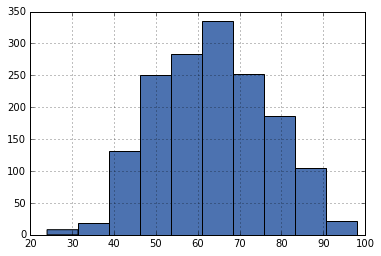

In [90]:
df['age'].hist()

In [84]:
df['age'].describe()

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1590.000000
mean       63.342138
std        13.137743
min        24.000000
25%              NaN
50%              NaN
75%              NaN
max        98.000000
Name: age, dtype: float64

### Self-Made Billionaire Ages

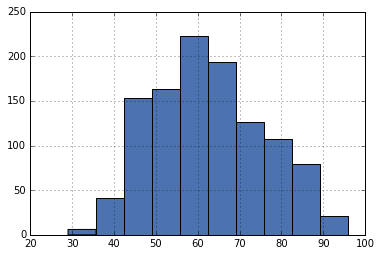

In [87]:
df[df['selfmade'] == 'self-made']['age'].hist()

In [91]:
df[df['selfmade'] == 'self-made']['age'].describe()

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1112.000000
mean       62.625899
std        13.054631
min        29.000000
25%              NaN
50%              NaN
75%              NaN
max        96.000000
Name: age, dtype: float64

### The Ages of People Who Have Inherited Billions

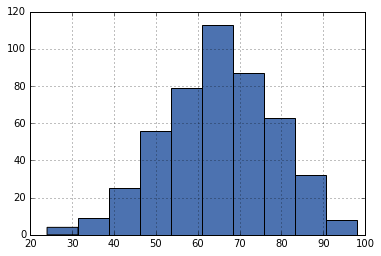

In [92]:
df[df['selfmade'] == 'inherited']['age'].hist()

In [93]:
df[df['selfmade'] == 'inherited']['age'].describe()

/usr/local/lib/python3.5/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    476.000000
mean      64.962185
std       13.174403
min       24.000000
25%             NaN
50%             NaN
75%             NaN
max       98.000000
Name: age, dtype: float64

### The Ages of Billionaires in Different Industries

In [96]:
df[['age', 'industry']].groupby('industry').mean().sort_values('age')

,age
industry,
Technology-Computer,54.496183
Hedge funds,55.325581
Venture Capital,58.200000
Non-consumer industrial,59.898734
Mining and metals,60.161765
Energy,61.651163
Private equity/leveraged buyout,62.277778
0,63.600000
Technology-Medical,63.870130


## Who are the youngest billionaires? The oldest? Age distribution - maybe make a graph about it?

### The Youngest Billionaires

In [97]:
df[['name', 'age']].sort_values('age').head()

,name,age
1838,Perenna Kei,24.0
605,Dustin Moskovitz,29.0
1586,Mark Zuckerberg,29.0
189,"Anton Kathrein, Jr.",29.0
602,Drew Houston,30.0


### The Oldest Billionaires

In [98]:
df[['name', 'age']].sort_values('age', ascending=False).head()

,name,age
516,"David Rockefeller, Sr.",98.0
1277,Karl Wlaschek,96.0
1328,Kirk Kerkorian,96.0
921,Henry Hillman,95.0
666,Erika Pohl-Stroher,95.0


### The Age Distribution of Billionaires

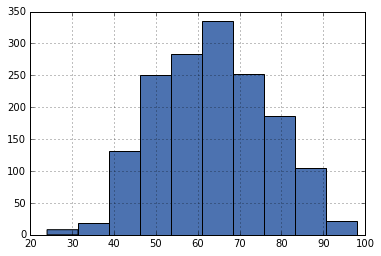

In [99]:
df['age'].hist()

## Maybe just made a graph about how wealthy they are in general?

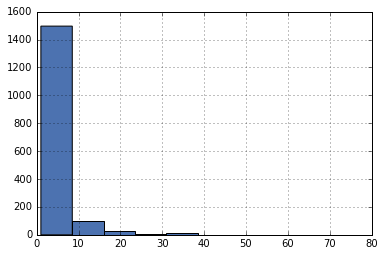

In [100]:
df['networthusbillion'].hist()

In [107]:
# df['networthusbillion'].sort_values(ascending = False).head(10)

284     76.0
348     72.0
124     64.0
2491    58.2
1377    48.0
381     40.0
509     40.0
2185    38.0
429     36.7
1128    34.7
Name: networthusbillion, dtype: float64

## Maybe plot their net worth vs age (scatterplot)

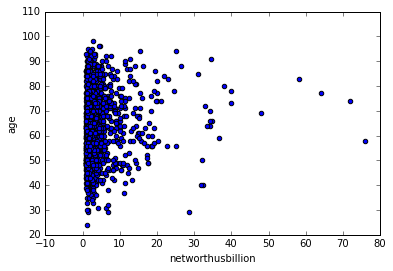

In [111]:
df[['networthusbillion', 'age']].plot(kind = 'scatter', x = 'networthusbillion', y = 'age')

## Make a bar graph of the top 10 or 20 richest

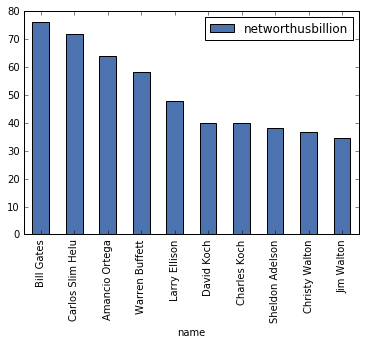

In [119]:
df[['name', 'networthusbillion']].sort_values('networthusbillion', ascending = False).head(10).plot(kind = 'bar', x = 'name', y = 'networthusbillion')

# 03: Finding your own dataset

## On Thursday, bring a dataset with you that's a csv/tsv/whatever. Try to open it in pandas, and do df.head() to make sure it displays OK.

In [ ]:
df = pd.read_json('https://data.sfgov.org/api/views/gxxq-x39z/rows.json')
# Can't get this to work! And I can't save the source code for some reason.

In [ ]:
df.head()